<a href="https://colab.research.google.com/github/AngelTroncoso/Ridge_y_Laso/blob/main/Regresion_RidgeyLaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión Ridge y Lasso (Regularized Regression - Ridge and Lasso) 🛡️**

##1: Cargar los Datos:

In [2]:
import pandas as pd
import io

csv_data = """ID_Campaña,Gasto_Google_Ads_USD,Gasto_Facebook_Ads_USD,Gasto_Instagram_Ads_USD,Gasto_Twitter_Ads_USD,Clics_Totales,Impresiones_Totales,CTR,Conversion_Rate,ROI_Porcentaje
1,500,300,200,50,1500,50000,0.03,0.02,120
2,700,400,250,60,2000,60000,0.033,0.025,145
3,100,50,20,5,300,10000,0.03,0.015,80
4,1200,800,500,100,3500,120000,0.029,0.03,180
5,800,500,300,70,2500,75000,0.033,0.028,160
6,600,350,220,55,1800,55000,0.032,0.023,130
7,200,100,80,10,600,20000,0.03,0.018,90
8,1500,1000,700,120,4500,150000,0.03,0.035,200
9,400,250,150,40,1200,40000,0.03,0.02,110
10,900,600,400,80,2800,85000,0.033,0.03,170
11,300,150,100,30,900,30000,0.03,0.019,100
12,1100,750,450,90,3200,110000,0.029,0.032,190
"""
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

   ID_Campaña  Gasto_Google_Ads_USD  Gasto_Facebook_Ads_USD  \
0           1                   500                     300   
1           2                   700                     400   
2           3                   100                      50   
3           4                  1200                     800   
4           5                   800                     500   

   Gasto_Instagram_Ads_USD  Gasto_Twitter_Ads_USD  Clics_Totales  \
0                      200                     50           1500   
1                      250                     60           2000   
2                       20                      5            300   
3                      500                    100           3500   
4                      300                     70           2500   

   Impresiones_Totales    CTR  Conversion_Rate  ROI_Porcentaje  
0                50000  0.030            0.020             120  
1                60000  0.033            0.025             145  
2                

## 2: Definir Características (X) y Variable Objetivo (y):

In [3]:
X = df.drop(['ID_Campaña', 'ROI_Porcentaje'], axis=1)
y = df['ROI_Porcentaje']

##3: Dividir Datos (Entrenamiento y Prueba):

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4: Escalar las Características (¡Importante para Regresión Regularizada!):

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##5: Entrenar Modelos Ridge y Lasso:

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Modelo Ridge
ridge_model = Ridge(alpha=1.0) # alpha es el parámetro de regularización, ajústalo según necesites
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("\n--- Resultados Regresión Ridge ---")
print(f"MSE Ridge: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R^2 Ridge: {r2_score(y_test, y_pred_ridge):.2f}")
print("Coeficientes Ridge (no nulos):")
for feature, coef in zip(X.columns, ridge_model.coef_):
    if abs(coef) > 0.01: # Mostrar solo coeficientes significativos
        print(f"  {feature}: {coef:.2f}")

# Modelo Lasso
lasso_model = Lasso(alpha=0.1) # alpha es el parámetro de regularización, ajústalo según necesites
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print("\n--- Resultados Regresión Lasso ---")
print(f"MSE Lasso: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R^2 Lasso: {r2_score(y_test, y_pred_lasso):.2f}")
print("Coeficientes Lasso (posiblemente con ceros para selección de características):")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.2f}") # Lasso puede hacer coeficientes exactamente cero


--- Resultados Regresión Ridge ---
MSE Ridge: 6.54
R^2 Ridge: 0.99
Coeficientes Ridge (no nulos):
  Gasto_Google_Ads_USD: 5.54
  Gasto_Facebook_Ads_USD: 5.95
  Gasto_Instagram_Ads_USD: 0.68
  Gasto_Twitter_Ads_USD: 6.77
  Clics_Totales: 4.67
  Impresiones_Totales: 4.64
  CTR: 2.05
  Conversion_Rate: 12.03

--- Resultados Regresión Lasso ---
MSE Lasso: 19.92
R^2 Lasso: 0.98
Coeficientes Lasso (posiblemente con ceros para selección de características):
  Gasto_Google_Ads_USD: 0.00
  Gasto_Facebook_Ads_USD: 7.78
  Gasto_Instagram_Ads_USD: -12.49
  Gasto_Twitter_Ads_USD: 11.49
  Clics_Totales: 0.00
  Impresiones_Totales: 0.00
  CTR: -0.48
  Conversion_Rate: 33.88


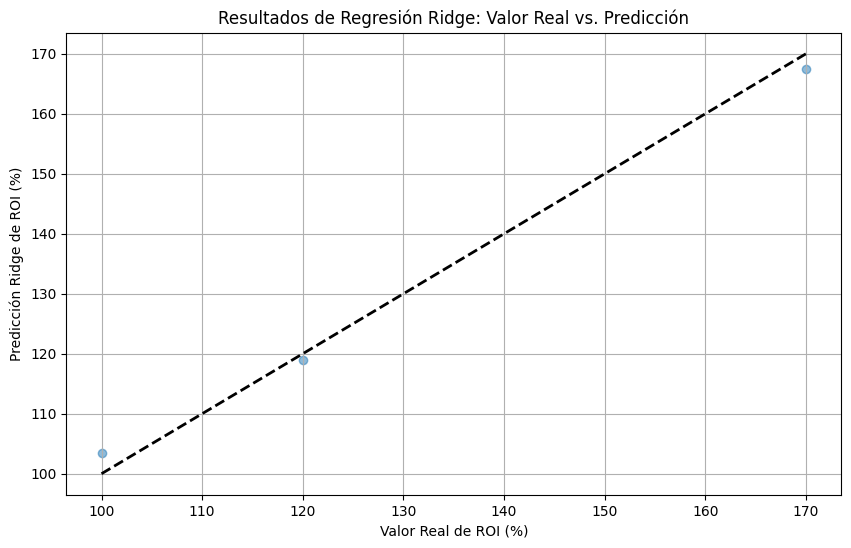

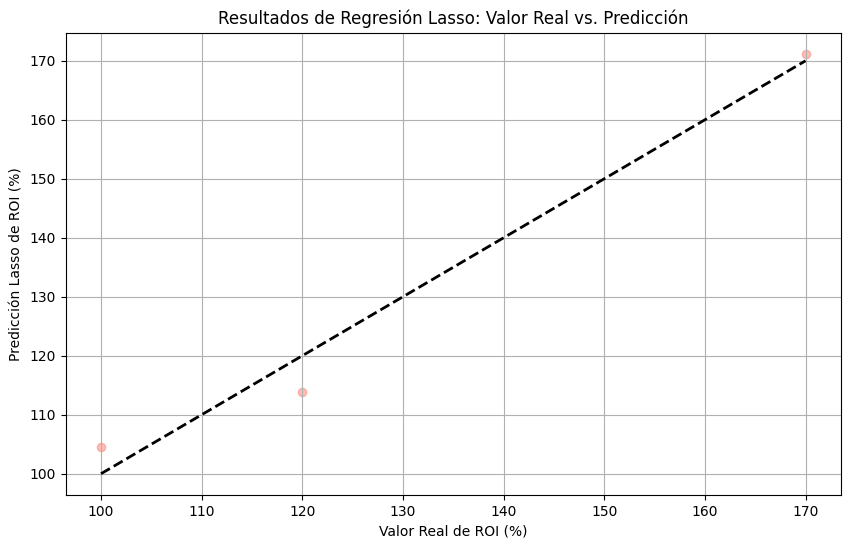

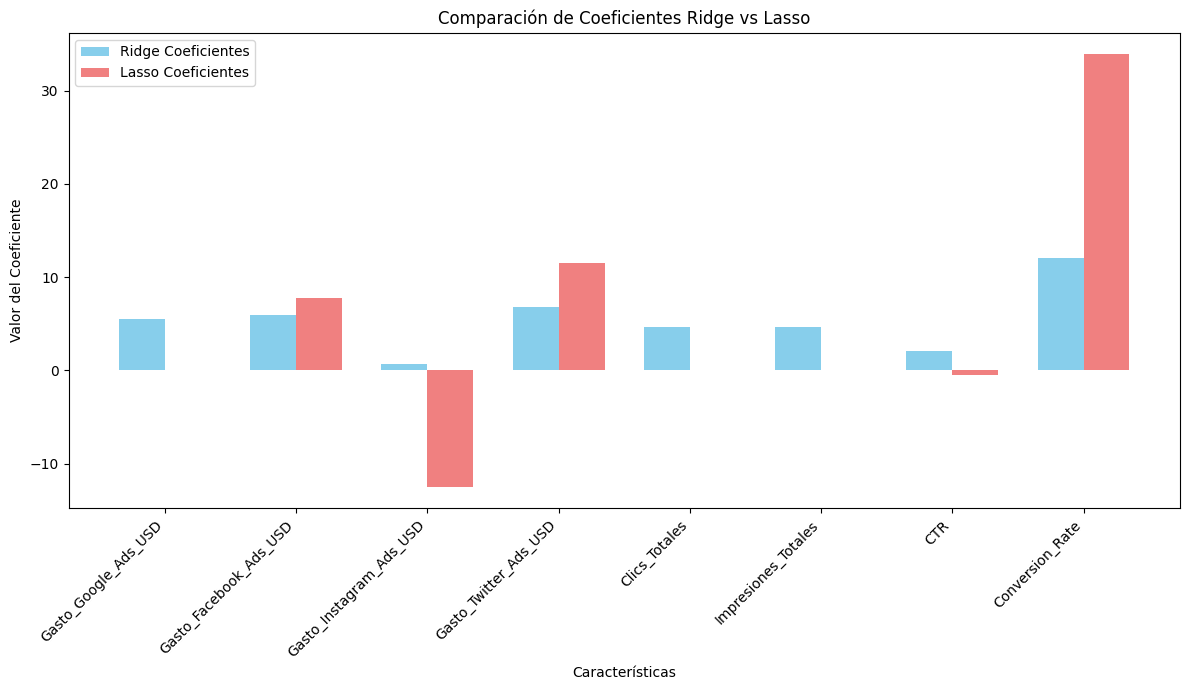

In [7]:
import matplotlib.pyplot as plt

# Gráfico de los resultados de Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal ideal
plt.xlabel("Valor Real de ROI (%)")
plt.ylabel("Predicción Ridge de ROI (%)")
plt.title("Resultados de Regresión Ridge: Valor Real vs. Predicción")
plt.grid(True)
plt.show()

# Gráfico de los resultados de Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='salmon')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal ideal
plt.xlabel("Valor Real de ROI (%)")
plt.ylabel("Predicción Lasso de ROI (%)")
plt.title("Resultados de Regresión Lasso: Valor Real vs. Predicción")
plt.grid(True)
plt.show()

# Gráfico comparativo de coeficientes (opcional, para visualizar la regularización)
features = X.columns
x_pos = np.arange(len(features))

plt.figure(figsize=(12, 7))
bar_width = 0.35
plt.bar(x_pos - bar_width/2, ridge_model.coef_, bar_width, label='Ridge Coeficientes', color='skyblue')
plt.bar(x_pos + bar_width/2, lasso_model.coef_, bar_width, label='Lasso Coeficientes', color='lightcoral')

plt.xlabel("Características")
plt.ylabel("Valor del Coeficiente")
plt.title("Comparación de Coeficientes Ridge vs Lasso")
plt.xticks(x_pos, features, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()